In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# PROJECT_DIR = "./cat-dogs-part2"
DATA_DIR = "./PetImages"
CATEGORIES = ["Dog", "Cat"]
IM_SIZE = 60

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:                
        path = os.path.join(DATA_DIR, category)
        class_num = CATEGORIES.index(category)
        
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IM_SIZE, IM_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
                # print(f"broken image: {path}/{img}")
            
    print("Created training data!")
    

create_training_data()

In [ ]:
# Balance data 50% cat and 50% dogs if possible
# Shuffle data!
import random

random.shuffle(training_data)

X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IM_SIZE, IM_SIZE, 1)


plt.imshow(X[0, :, :, 0], cmap='gray')
print("Random animal:")
plt.show()

In [ ]:
np.save("training_X.npy", X)
np.save("training_y.npy", y)

In [2]:
X = np.load("training_X.npy")
y = np.load("training_y.npy")

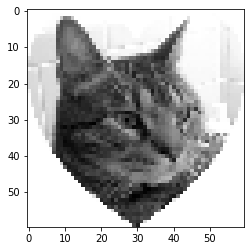

(24946, 60, 60, 1)
(24946,)


In [3]:
plt.imshow(X[0][:, :, 0], cmap='gray')
plt.show()

print(X.shape)
print(y.shape)

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

X = tf.keras.utils.normalize(X, axis=1)
# X = X / 255.0


config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.4
session = tf.compat.v1.Session(config=config)


with session as sess:
    model = Sequential()
    # Input layer
    model.add(Conv2D(64, (3, 3), input_shape = X.shape[1:]))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten Layer
    model.add(Flatten())
    model.add(Dense(64))

    # Output layer
    model.add(Dense(1))
    model.add(Activation("sigmoid"))

    model.compile(loss="binary_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])
    
    model.fit(X, y, batch_size=50, validation_split=0.5, epochs=2)
    val_loss, val_accuracy = model.evaluate(X, y)

    sess.close()
print("End")

Train on 12473 samples, validate on 12473 samples
Epoch 1/2
12473/12473 [==============================] - 4s 321us/sample - loss: 0.6730 - accuracy: 0.5649 - val_loss: 0.6362 - val_accuracy: 0.6530
Epoch 2/2
24946/24946 [==============================] - 3s 109us/sample - loss: 0.6447 - accuracy: 0.6316
End


In [15]:


print()
print(f"Loss: {val_loss:>5.5f}")
print(f"Accuracy: {val_accuracy:>5.5f}")


Loss: 0.50832
Accuracy: 0.75952
